Question 03: Create your own fitness function that works similarly to OneMax, except that the maximum fitness is when 50% of the individual's genes are 1, with a linear decay on either side. That is, calculate the sum of an individual like OneMax does, let's call it i, and then use the following pseudocode:

if (i) <= Individual_Length/2 return (i)

else return Individual_Length-i;

Using tournament selection, what is the smallest number of individuals you need to process to solve this? Why is this problem so much easier than OneMax?

Ans 3:

First part of the question:
<br></br>

In this problem, we define perfect fitness when 50% genes are 1. With a linear decay on either side means that the no. of ones should not be away from 50.

After making the foll. code modifications:
1. changed the evaluation function to the provided pseudocode
2. changed the while loop to:
    ```
    while max(fitnessValues) < ONE_MAX_LENGTH / 2 and generationCounter < MAX_GENERATIONS:
    ```
, the minimum no. of individuals (population) needed to process to solve this is 6.

Note: max gen = 50. final ans: 6 x 50 = 300

<br></br>


Second part of the question:
<br></br>
The modified problem of achieving 50% `1`s with linear decay in fitness is much easier than the OneMax problem due to the differences in their fitness landscapes. In the OneMax problem, the goal is to maximize the number of `1`s in an individual's bitstring, which requires the algorithm to find a solution where all bits are set to `1`. This creates a steep gradient toward the optimal solution, making it challenging for the algorithm to explore potential solutions without getting stuck in suboptimal configurations. The search space is more constrained, which can lead to stagnation or require many generations to find the global maximum.

**In contrast, the modified problem only requires that 50% of the bits are `1`s, allowing for many possible combinations that achieve this balance.** The linear decay in fitness for counts above and below 50% creates a broader peak around the optimal solution, making it easier for the algorithm to converge. Because the fitness landscape is smoother and less "spiky," the algorithm can explore solutions more freely and avoid local optima. There are many viable high-fitness individuals, meaning the algorithm does not have to reach an extreme, such as having all `1`s.

Furthermore, the symmetry in the solutions makes the modified problem easier. In the OneMax problem, there is only one optimal solution (all `1`s), while the modified problem has numerous combinations of `0`s and `1`s that result in exactly 50% `1`s. This smoothness in the fitness gradient means the algorithm can gradually improve toward the goal, rather than being forced to drive toward a singular, extreme solution. Overall, the modified problem's broader range of optimal or near-optimal solutions and smoother landscape allow for easier navigation of the search space, making it a simpler problem to solve compared to OneMax.

   # GA applied to OneMax

This notebook implements a simple GA in a fairly lowlevel way. In later examples we'll use more highlevel operators, but it is a very valuable exercise to ensure you understand what this code is actually doing. Make sure you understand the processes below before moving to the more high-level toolboxes!

Install DEAP. Note that if you are running this on your own computer you might not need to do this. In fact, it is better practice to install it so that it is always available, but when running on Colab, we do need this.

In [1]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.7 MB/s eta 0:00:00


Import the DEAP tools and useful libraries (random and matplotlib).

In [2]:
from deap import base
from deap import creator
from deap import tools

import random

import matplotlib.pyplot as plt

Set our Genetic Algorithm parameters

In [14]:
# Genetic Algorithm constants:
POPULATION_SIZE = 6
P_CROSSOVER = 0.7  # probability for crossover
P_MUTATION = 0.01   # probability for mutating an individual
MAX_GENERATIONS = 50

Set any problem-specific constants here. In this case we need to know how long the string is.

In [4]:
ONE_MAX_LENGTH = 100  # length of bit string to be optimized

Set the random seed. This is important so that we can reproduce runs later on.

In [5]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

Create our toolbox. Note that we can pull in a bunch of predefined operators to tailor our Evolutionary Algorithm, which, of course, in this case is a GA. Notice that it is possible to create our **own** operators and functions to use, which is what we do with our **oneMaxFitness** function below.

In [15]:
toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)
#creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation:
# compute the number of '1's in the individual

def oneMaxFitness(individual):
    i = sum(individual)
    if i <= len(individual) / 2:
        return i,
    else:
        return len(individual) - i,


toolbox.register("evaluate", oneMaxFitness)

# genetic operators:

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

Here is the main GA loop. We will iterate through it up to the MAX_GENERATIONS parameter and then print out our best individual.

In [16]:
# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)
print("Population: ", population)
print("Population.length: ", len(population))
print("Population[0].length: ", len(population[0]))
generationCounter = 0

# calculate fitness tuple for each individual in the population:
fitnessValues = list(map(toolbox.evaluate, population))
for individual, fitnessValue in zip(population, fitnessValues):
    individual.fitness.values = fitnessValue

print("individual.fitness.values: ", individual.fitness.values[0])
print("max(fitnessValues): ", max(fitnessValues))

# extract fitness values from all individuals in population:
fitnessValues = [individual.fitness.values[0] for individual in population]

# initialize statistics accumulators:
maxFitnessValues = []
meanFitnessValues = []

# main evolutionary loop:
# stop if max fitness value reached the known max value
# OR if number of generations exceeded the preset value:
while max(fitnessValues) < ONE_MAX_LENGTH/2 and generationCounter < MAX_GENERATIONS:
    # update counter:
    generationCounter = generationCounter + 1

    # apply the selection operator, to select the next generation's individuals:
    offspring = toolbox.select(population, len(population))
    # clone the selected individuals:
    offspring = list(map(toolbox.clone, offspring))

    # apply the crossover operator to pairs of offspring:
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < P_CROSSOVER:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < P_MUTATION:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # calculate fitness for the individuals with no previous calculated fitness value:
    freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
    freshFitnessValues = list(map(toolbox.evaluate, freshIndividuals))
    for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
        individual.fitness.values = fitnessValue

    # replace the current population with the offspring:
    population[:] = offspring

    # collect fitnessValues into a list, update statistics and print:
    fitnessValues = [ind.fitness.values[0] for ind in population]

    maxFitness = max(fitnessValues)
    meanFitness = sum(fitnessValues) / len(population)
    maxFitnessValues.append(maxFitness)
    meanFitnessValues.append(meanFitness)
    print("- Generation {}: Max Fitness = {}, Avg Fitness = {}".format(generationCounter, maxFitness, meanFitness))

    # find and print best individual:
    best_index = fitnessValues.index(max(fitnessValues))
    print("Best Individual = ", *population[best_index], "\n")

Population:  [[0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0], [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1], [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1

Now that we're done, let's print out some statistics. Generally we record (at least) the max and average over time.

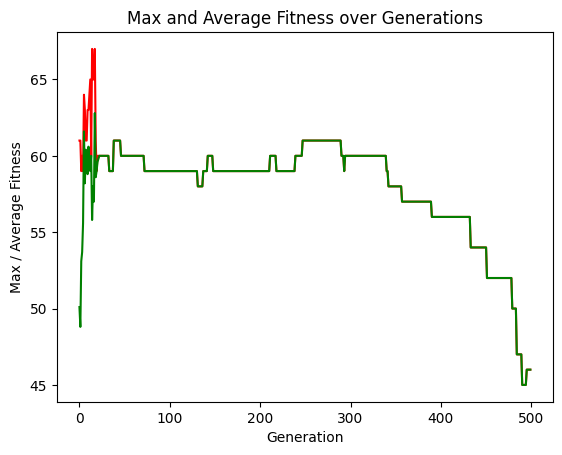

In [ ]:
# Genetic Algorithm is done - plot statistics:
#sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average Fitness over Generations')
plt.show()